<a href="https://colab.research.google.com/github/adrienpayong/educativecourse/blob/main/comorphological_operation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

class Morphological:
    def __init__(self, path):
        self.image_path = path
        self.image = cv2.imread(self.image_path, 0)

    def erode(self):
        """erodes away the boundaries of foreground object (Always try to keep foreground in white)."""
        kernel = np.ones((5, 5), np.uint8)
        erosion = cv2.erode(self.image, kernel, iterations=1)
        cv2.imwrite(os.path.join("erosed.jpg"), erosion)

    def dilate(self):
        """It increases the white region in the image or size of foreground object increases"""
        kernel = np.ones((5, 5), np.uint8)
        dilation = cv2.dilate(self.image, kernel, iterations=1)
        cv2.imwrite(os.path.join("dilated.jpg"), dilation)

    def opening(self):
        """Opening is just another name of erosion followed by dilation. It is useful in removing noise"""
        kernel = np.ones((5, 5), np.uint8)
        opening = cv2.morphologyEx(self.image, cv2.MORPH_OPEN, kernel)
        cv2.imwrite(os.path.join("opened.jpg"), opening)

    def closing(self):
        """Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside
        the foreground objects, or small black points on the object. """
        kernel = np.ones((5, 5), np.uint8)
        closing = cv2.morphologyEx(self.image, cv2.MORPH_CLOSE, kernel)
        cv2.imwrite(os.path.join("closing.jpg"), closing)

    def get_structuring_element(self):
        """get structuring  element to work on above morphological operation if required"""
        rect_element = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
        print(rect_element)
        elliptical_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        print(elliptical_element)
  
    def  bl_ht(self):
        """Create a rectangle kernel (5x5) and use a blackhat 
            operation to locate dark spots on a light # backdrop.  """
        rect_element = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
        bl_ht  = cv2.morphologyEx(self.image, cv2.MORPH_BLACKHAT,  rect_element)
        cv2.imwrite(os.path.join("blackhat.jpg"),  bl_ht )
    
    def  tp_h(self):
        """Likewise, a tophat (sometimes known as a "whitehat") operation will allow us to detect light regions on a dark backdrop """
        rect_element = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
        tp_h = cv2.morphologyEx(self.image, cv2.MORPH_TOPHAT, rect_element)
        cv2.imwrite(os.path.join("tophat.jpg"), tp_h)


In [ ]:
# Morphological transformation
image_path_src = os.path.join("test.jpg")
morpho_obj = Morphological(image_path_src)
morpho_obj.erode()
morpho_obj.dilate()
morpho_obj.opening()
morpho_obj.closing()
morpho_obj.get_structuring_element()
morpho_obj.bl_ht()
morpho_obj.tp_h()

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


In [ ]:
## Function to call to dispay images
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [ ]:
## Read all the images
image0 = cv2.imread("test.jpg")
image1 = cv2.imread("dilated.jpg")
image2 = cv2.imread("erosed.jpg")
image3 = cv2.imread("opened.jpg")
image4 = cv2.imread("closing.jpg")

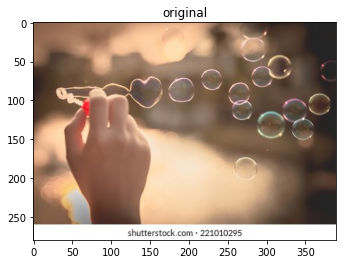

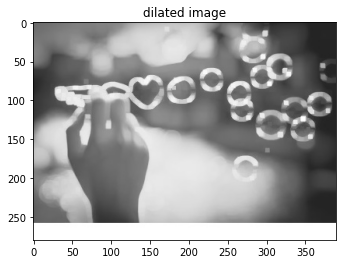

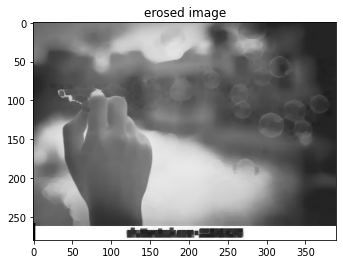

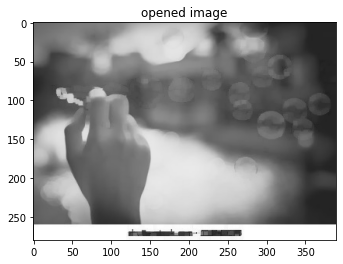

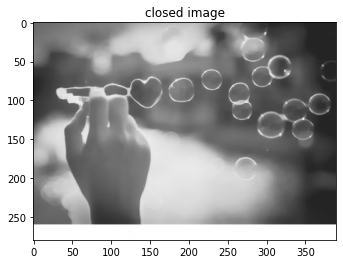

In [ ]:
## Display images
plt_imshow("original",image0)
plt_imshow("dilated image",image1)
plt_imshow("erosed image",image2)
plt_imshow("opened image",image3)
plt_imshow("closed image",image4)
